In [22]:
import pandas as pd
import quandl # has a bunch of datasets through quandl.com
import math, datetime
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import joblib # for saving pickles

In [40]:
df = quandl.get('WIKI/GOOGL')

In [41]:
df.head()
x = df.copy()

In [42]:
# Regression - Take in data and find best fit line
# y = mx + b, the point is to find m and b
# features and labels

# Ex. - pattern recognition with stock prices

# neural networks good for finding relationships between attributes, but with regression it's best to simplify and eliminate useless features

In [43]:
df = x

In [44]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']] # retaining desired attributes while eliminating all others

# creating normalized relationships. the specific formula doesn't matter as long as each feature wanted is involved because the scale is standardized since it is applied to entire dataset
df['HL_PCT'] = (df['Adj. High']-df['Adj. Low'])/df['Adj. Low'] * 100
df['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] * 100

# which features impact price? none except adj. close. 
# must consider importance of each individual feature and adjust accordingly
#           price         x            x             x 
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_19160/2487019306.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HL_PCT'] = (df['Adj. High']-df['Adj. Low'])/df['Adj. Low'] * 100
/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_19160/2487019306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] * 100


In [45]:
forecast_col = 'Adj. Close'

df.fillna(-99999, inplace=True)

In [46]:
forecast_out = int(math.ceil(0.1*len(df)))

In [47]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [48]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,214.005615
2004-08-20,54.322689,8.537313,7.227007,22834300.0,210.725489
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,208.072299
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,218.288837
2004-08-25,53.164113,3.966115,1.183658,9188600.0,223.309335


In [49]:


X = np.array(df.drop(['label', 'Adj. Close'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])
y = np.array(df['label'])

/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_19160/3525989176.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label', 'Adj. Close'],1))


In [50]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [51]:
# clf = LinearRegression()
# clf.fit(X_train, y_train)

clf = joblib.load('linearregreesion.pick') # testing out pickling / saving models and loading them

accuracy = clf.score(X_test, y_test)
print(accuracy)

FileNotFoundError: [Errno 2] No such file or directory: 'linearregreesion.pick'

In [ ]:
forecast_set = clf.predict(X_lately)

print(forecast_set, accuracy, forecast_out)

[ 788.99107913  767.07546078  792.40992882  796.99941548  804.80469004
  792.96858963  803.2672522   803.35356398  796.02660544  799.62088847
  802.19113581  807.74297521  792.30330843  779.19930153  782.31891625
  796.14984252  793.99506524  808.67374099  813.56088652  828.0003198
  827.16469888  833.70813441  836.49711514  834.23376294  827.96346328
  831.15898552  834.84008667  830.83347601  829.32941432  827.38168592
  828.83496166  823.01947211  822.05417856  810.09340177  826.04905768
  826.563513    832.3238113   843.09106671  846.41171714  845.63708906
  849.2554468   848.72700511  850.80278235  846.89955013  848.81998387
  843.51741685  848.04667639  862.62504779  868.96333343  878.08633269
  875.74707142  861.14639719  841.02440957  839.0189355   833.42589885
  836.76821804  839.47110011  840.89448341  848.50682059  849.09978242
  849.84941315  854.53909059  858.89905627  859.84059203  857.15668393
  862.28709124  866.37076457  869.33168245  871.28705664  870.35076766
  867.8

In [52]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400 # seconds
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

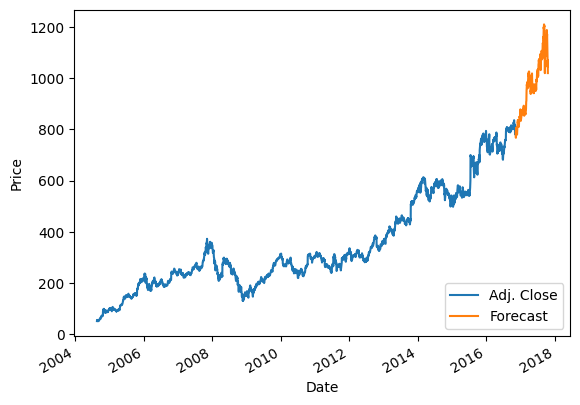

In [53]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [54]:
# Pickling - serialization of any object such as classifier
# Saves the training of an algorithm
# Helpful when there's a bunch of data involved

# to save smth and create file
joblib.dump(clf,'linearregreesion.pickle')

['linearregreesion.pickle']

In [55]:
# to load saved object from a existing file
clf = joblib.load('linearregreesion.pickle')